<a href="https://colab.research.google.com/github/Amalaa-George/Heart-failure-prediction/blob/main/heart_failure_prediction_data_analysis_and_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets list


    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation      or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


# Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
heart['Age'].isnull().sum()

0

In [9]:
print(heart['Sex'].value_counts())
print('Not missing value :',heart['Sex'].value_counts()[0]+heart['Sex'].value_counts()[1])

Sex
M    725
F    193
Name: count, dtype: int64
Not missing value : 918


<ipython-input-9-22fafc3ab159>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not missing value :',heart['Sex'].value_counts()[0]+heart['Sex'].value_counts()[1])
<ipython-input-9-22fafc3ab159>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not missing value :',heart['Sex'].value_counts()[0]+heart['Sex'].value_counts()[1])


In [10]:
heart.duplicated().sum()

0

In [12]:
heart.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# Data Preprocessing

In [13]:
new_= heart

In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit(new_['Sex'])

LabelEncoder()

In [15]:
le.classes_

array(['F', 'M'], dtype=object)

In [16]:
new_['Encoder_sex']=le.transform(new_['Sex'])

In [17]:
new_=new_.drop('Sex',axis=1)

In [18]:
print(heart['ST_Slope'].value_counts())

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [19]:
le.fit(new_['ST_Slope'])
le.classes_

array(['Down', 'Flat', 'Up'], dtype=object)

In [20]:
new_['Encoder_ST_Slope']=le.transform(new_['ST_Slope'])

In [21]:
new_=new_.drop('ST_Slope',axis=1)

In [22]:
print(heart['ExerciseAngina'].value_counts())

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


In [23]:
le.fit(new_['ExerciseAngina'])
le.classes_

array(['N', 'Y'], dtype=object)

In [24]:
new_['Encoder_ExerciseAngina']=le.transform(new_['ExerciseAngina'])

In [25]:
new_=new_.drop('ExerciseAngina',axis=1)

In [26]:
new_

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina
0,40,ATA,140,289,0,Normal,172,0.0,0,1,2,0
1,49,NAP,160,180,0,Normal,156,1.0,1,0,1,0
2,37,ATA,130,283,0,ST,98,0.0,0,1,2,0
3,48,ASY,138,214,0,Normal,108,1.5,1,0,1,1
4,54,NAP,150,195,0,Normal,122,0.0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,1.2,1,1,1,0
914,68,ASY,144,193,1,Normal,141,3.4,1,1,1,0
915,57,ASY,130,131,0,Normal,115,1.2,1,1,1,1
916,57,ATA,130,236,0,LVH,174,0.0,1,0,1,0


In [27]:
print(heart['RestingECG'].value_counts())

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


In [28]:
le.fit(new_['RestingECG'])
le.classes_

array(['LVH', 'Normal', 'ST'], dtype=object)

In [29]:
new_['Encoder_RestingECG']=le.transform(new_['RestingECG'])

In [30]:
new_=new_.drop('RestingECG',axis=1)

In [31]:
new_.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG
0,40,ATA,140,289,0,172,0.0,0,1,2,0,1
1,49,NAP,160,180,0,156,1.0,1,0,1,0,1
2,37,ATA,130,283,0,98,0.0,0,1,2,0,2
3,48,ASY,138,214,0,108,1.5,1,0,1,1,1
4,54,NAP,150,195,0,122,0.0,0,1,2,0,1


In [32]:
print(heart['ChestPainType'].value_counts())

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


In [33]:
le.fit(new_['ChestPainType'])
le.classes_

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [34]:
new_['Encoder_ChestPainType']=le.transform(new_['ChestPainType'])

In [35]:
new_=new_.drop('ChestPainType',axis=1)

In [36]:
new_.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
0,40,140,289,0,172,0.0,0,1,2,0,1,1
1,49,160,180,0,156,1.0,1,0,1,0,1,2
2,37,130,283,0,98,0.0,0,1,2,0,2,1
3,48,138,214,0,108,1.5,1,0,1,1,1,0
4,54,150,195,0,122,0.0,0,1,2,0,1,2


In [37]:
new_.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,1.361656,0.404139,0.989107,0.781046
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.607056,0.490992,0.631671,0.956519
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000


In [38]:
new_

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
0,40,140,289,0,172,0.0,0,1,2,0,1,1
1,49,160,180,0,156,1.0,1,0,1,0,1,2
2,37,130,283,0,98,0.0,0,1,2,0,2,1
3,48,138,214,0,108,1.5,1,0,1,1,1,0
4,54,150,195,0,122,0.0,0,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,1,0,1,3
914,68,144,193,1,141,3.4,1,1,1,0,1,0
915,57,130,131,0,115,1.2,1,1,1,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,1


In [39]:
new_.shape

(918, 12)

# Data Analysis and Visualization

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0.5, 1.0, 'Distribution of target class')

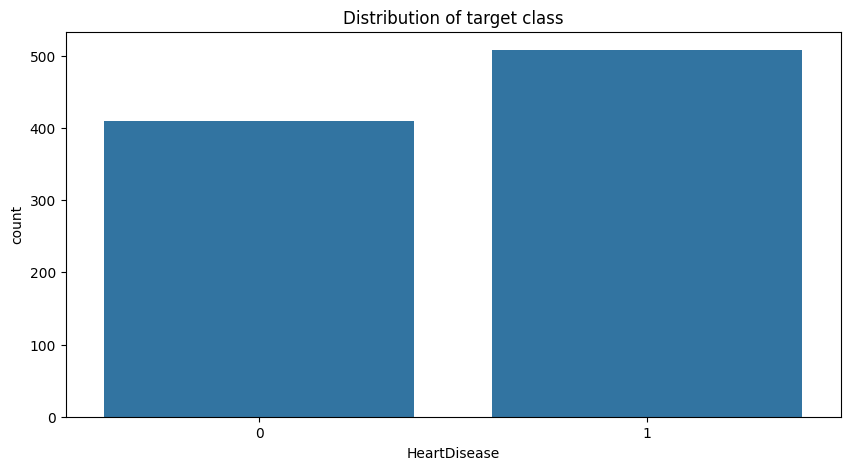

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x='HeartDisease', data=new_)
plt.title("Distribution of target class")

Text(0.5, 1.0, 'Correlation of numerical attributes with HeartDisease')

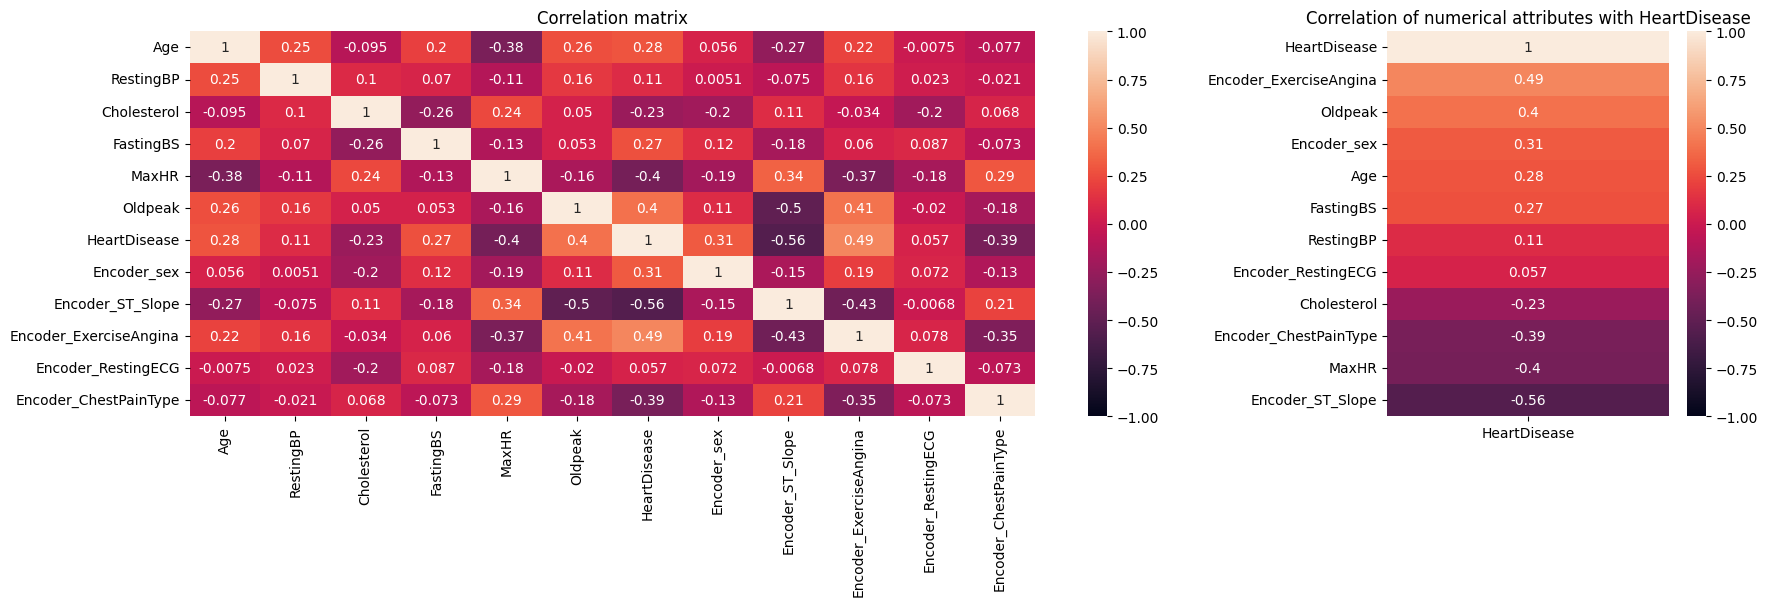

In [42]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=new_.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=new_.corr(method="pearson", numeric_only=True)[["HeartDisease"]].sort_values('HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with HeartDisease")

In [43]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="Sex", title="Distribution of Sex")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [44]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="ChestPainType", title="Distribution of ChestPain Type")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [45]:
px.pie(values=heart['ChestPainType'].value_counts(),names =heart['ChestPainType'].value_counts().index).update_layout(title='Chest Pain Type')

In [47]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="RestingBP", title="Distribution of RestingBP")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=heart, x="RestingBP", title="Boxplot of RestingBP")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [48]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="Cholesterol", title="Distribution of Cholesterol")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=heart, x="Cholesterol", title="Boxplot of Cholesterol")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [49]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="FastingBS", title="Distribution of FastingBS")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [50]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="RestingECG", title="Distribution of RestingECG")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [51]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="MaxHR", title="Distribution of MaxHR")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=heart, x="MaxHR", title="Boxplot of MaxHR")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [52]:
plt.figure(figsize=(20,10))
fig = px.histogram(data_frame=heart , x ="ExerciseAngina" , title="Distribution of ExerciseAngina" )
fig.update_traces(marker={"color":"red" , "opacity":0.6 , "line":{"width":4,"color":"black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [53]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="Oldpeak", title="Distribution of Oldpeak")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=heart, x="Oldpeak", title="Boxplot of Oldpeak")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [54]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=heart, x="ST_Slope", title="Distribution of ST_Slope")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [55]:
px.histogram(heart,x='Age',color='HeartDisease').update_layout(title='Age Distribution')

In [ ]:
# numerical_cols = list(heart.select_dtypes(exclude="string").columns)
# print(numerical_cols)

In [ ]:
# categorical_cols = list(heart.select_dtypes(include="object").columns)
# print(categorical_cols)

In [56]:
list(new_.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Encoder_sex',
 'Encoder_ST_Slope',
 'Encoder_ExerciseAngina',
 'Encoder_RestingECG',
 'Encoder_ChestPainType']

In [ ]:
# NEW_=new_

# Classification Model
# ---> Algorithms

In [57]:
#Importing the classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

In [58]:
scaler = MinMaxScaler()
columns = new_.columns
new_ = pd.DataFrame(scaler.fit_transform(new_))
new_.columns = columns
new_.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Encoder_sex,Encoder_ST_Slope,Encoder_ExerciseAngina,Encoder_RestingECG,Encoder_ChestPainType
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,1.0,0.0,0.5,0.333333
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.5,0.0,0.5,0.666667
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,1.0,0.0,1.0,0.333333
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,0.5,1.0,0.5,0.000000
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,1.0,0.0,0.5,0.666667


In [59]:
attributes = ["Age", "Encoder_sex", "Encoder_ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "Encoder_RestingECG", "MaxHR", "Encoder_ExerciseAngina", "Oldpeak", "Encoder_ST_Slope"]
X = new_[attributes]
y = new_['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [60]:
#Creating and fitting the model, as well as generating predictions
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

#Model evaluation
#Mean absolute error

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

#Accuracy score

svm_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(svm_model_accuracy))
svm_model_accuracy = round(accuracy_score(y_test, preds)*100,2)
print('Accuracy = ' , svm_model_accuracy ,' %')
accuracies = pd.DataFrame({"Algorithm":["SVM"], "Score":[svm_model_accuracy]})


#Classification report

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

#Confusion matrix

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.15217391304347827

Accuracy score:
0.8478260869565217

Accuracy =  84.78  %
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81        77
         1.0       0.85      0.90      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184


Confusion matrix: 
[[60 17]
 [11 96]]



In [61]:
#Creating and fitting the model, as well as generating predictions
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
preds = lr_model.predict(X_test)

#Model evaluation
#Mean absolute error

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

#Accuracy score

lr_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(lr_model_accuracy))
lr_model_accuracy = round(accuracy_score(y_test, preds)*100,2)
print('Accuracy = ' , lr_model_accuracy ,' %')
accuracies = pd.DataFrame({"Algorithm":["lr"], "Score":[lr_model_accuracy]})


#Classification report

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

#Confusion matrix

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))

The mean absolute error:
0.15760869565217392

Accuracy score:
0.842391304347826

Accuracy =  84.24  %
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81        77
         1.0       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184


Confusion matrix: 
[[60 17]
 [12 95]]



In [62]:
#Creating and fitting the model, as well as generating predictions
clf_model = RandomForestClassifier(n_estimators = 100)
clf_model.fit(X_train, y_train)
preds = clf_model.predict(X_test)

#Model evaluation
#Mean absolute error

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

#Accuracy score

clf_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(clf_model_accuracy))
clf_model_accuracy = round(accuracy_score(y_test, preds)*100,2)
print('Accuracy = ' , clf_model_accuracy ,' %')
accuracies = pd.DataFrame({"Algorithm":["clf"], "Score":[clf_model_accuracy]})


#Classification report

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

#Confusion matrix

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))

The mean absolute error:
0.13043478260869565

Accuracy score:
0.8695652173913043

Accuracy =  86.96  %
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84        77
         1.0       0.87      0.91      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184


Confusion matrix: 
[[63 14]
 [10 97]]

